1.import the libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import os
 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


2.EDA: exploratory data analysis

In [8]:
df=pd.read_csv('heart_disease.csv')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



- **age**: العمر   
- **sex**: الجنس  
  - 1 = Male (ذكر)  
  - 0 = Female (أنثى)  
- **cp**: نوع ألم الصدر  
  - 0 = Typical Angina (ألم صدر نموذجي)  
  - 1 = Atypical Angina (ألم صدر غير نموذجي)  
  - 2 = Non-anginal Pain (ألم غير متعلق بالصدر)  
  - 3 = Asymptomatic (بدون أعراض)  
- **trestbps**: ضغط الدم عند الراحة (مثال: 130 = 130 mmHg)  
- **chol**: مستوى الكوليسترول (مثال: 220 = 220 mg/dl)  
- **fbs**: سكر الدم  
  - 1 = Fasting Blood Sugar > 120 mg/dl (سكر الدم > 120 ملجم/دل)  
  - 0 = Fasting Blood Sugar ≤ 120 mg/dl (سكر الدم ≤ 120 ملجم/دل)  
- **restecg**: نتائج تخطيط القلب عند الراحة  
  - 0 = Normal (طبيعي)  
  - 1 = ST-T Wave Abnormality (وجود خلل في الموجة ST-T)  
  - 2 = Left Ventricular Hypertrophy (وجود تضخم في البطين الأيسر)  
- **thalach**: أقصى معدل لضربات القلب تم تحقيقه (مثال: 150 = 150 bpm)  
- **exang**: ألم في الصدر أثناء الجهد  
  - 1 = Exercise Induced Angina (ألم صدر أثناء الجهد)  
  - 0 = No Exercise Induced Angina (لا ألم أثناء الجهد)  
- **oldpeak**: انخفاض المقطع ST في تخطيط القلب (مثال: 1.5 = انخفاض بمقدار 1.5)  
- **slope**: ميل المقطع ST أثناء التمرين  
  - 0 = Upsloping (ميل للأعلى)  
  - 1 = Flat (مسطح)  
  - 2 = Downsloping (ميل للأسفل)  
- **ca**: The number of major coronary arteries with occlusion or functional deterioration as seen in fluoroscopy.عدد الشرايين التاجية الرئيسية التي بها انسداد أو تدهور وظيفي 
  - 0 means no obstruction,
  - 1 means obstruction in one artery,
  - 2 means obstruction in two arteries,
    
- **thal**: نوع الثالاسيميا  
  - 1 = Normal (طبيعي)  
  - 2 = Fixed Defect (عيب ثابت)  
  - 3 = Reversable Defect (عيب قابل للعلاج)  
- **target**: وجود مرض في القلب  
  - 1 = Presence of Heart Disease (وجود المرض)  
  - 0 = No Heart Disease (عدم وجود المرض)  

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
# Display the duplicated rows in the DataFrame
duplicated_rows = df[df.duplicated()]

# Count the number of duplicated rows
num_duplicated_before = df.duplicated().sum()

# Comment on the results
print(f"The number of duplicated rows before removal: {num_duplicated_before}")
print("Duplicated rows are displayed below:")
print(duplicated_rows)


The number of duplicated rows before removal: 1
Duplicated rows are displayed below:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [16]:
# Handle duplicated rows (example: remove duplicates)
df_no_duplicates = df.drop_duplicates()

In [17]:
# calculates the number of duplicated rows after removal
num_duplicated_after = df_no_duplicates.duplicated().sum()
print(f"Number of duplicated rows after removal: {num_duplicated_after}")

Number of duplicated rows after removal: 0


analyze the contionous Variables: age, trestbps, chol, thalach, oldpeak
analyze Discrete variables:ca

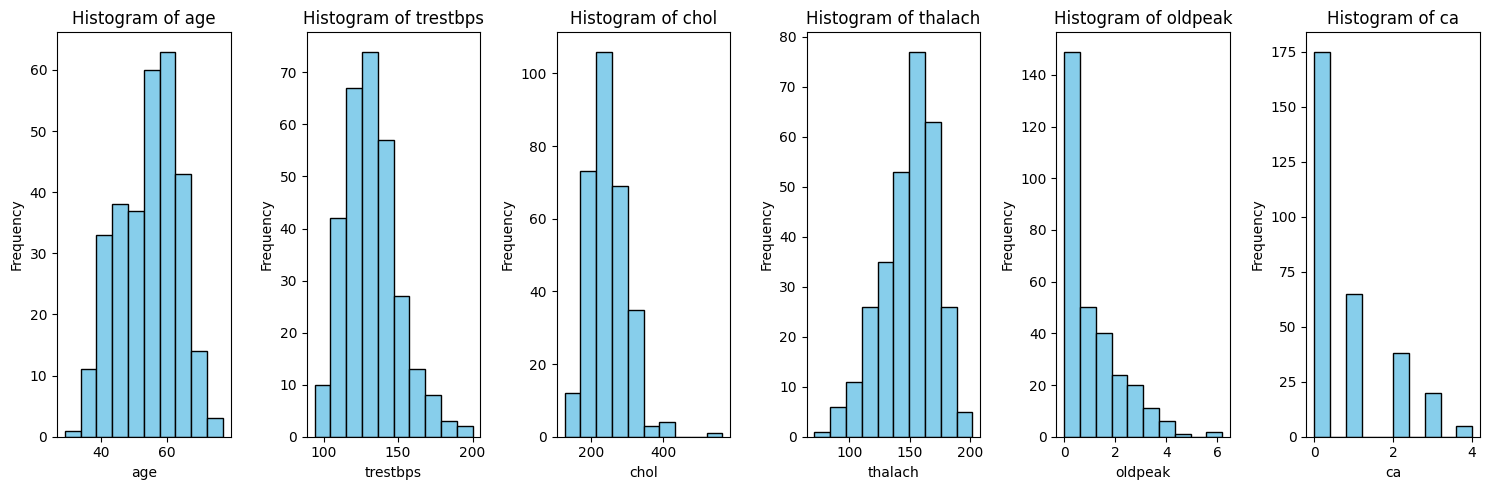

In [18]:


# List of variables to plot the histogram for
variables_to_plot = ['age', 'trestbps', 'chol', 'thalach','oldpeak','ca']

# Determine the number of subplots based on the number of variables
num_variables = len(variables_to_plot)
fig, axes = plt.subplots(nrows=1, ncols=num_variables, figsize=(15, 5))

# If there is only one variable, make sure axes is iterable
if num_variables == 1:
    axes = [axes]

# Plot a histogram for each selected variable
for i, variable in enumerate(variables_to_plot):
    axes[i].hist(df[variable], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


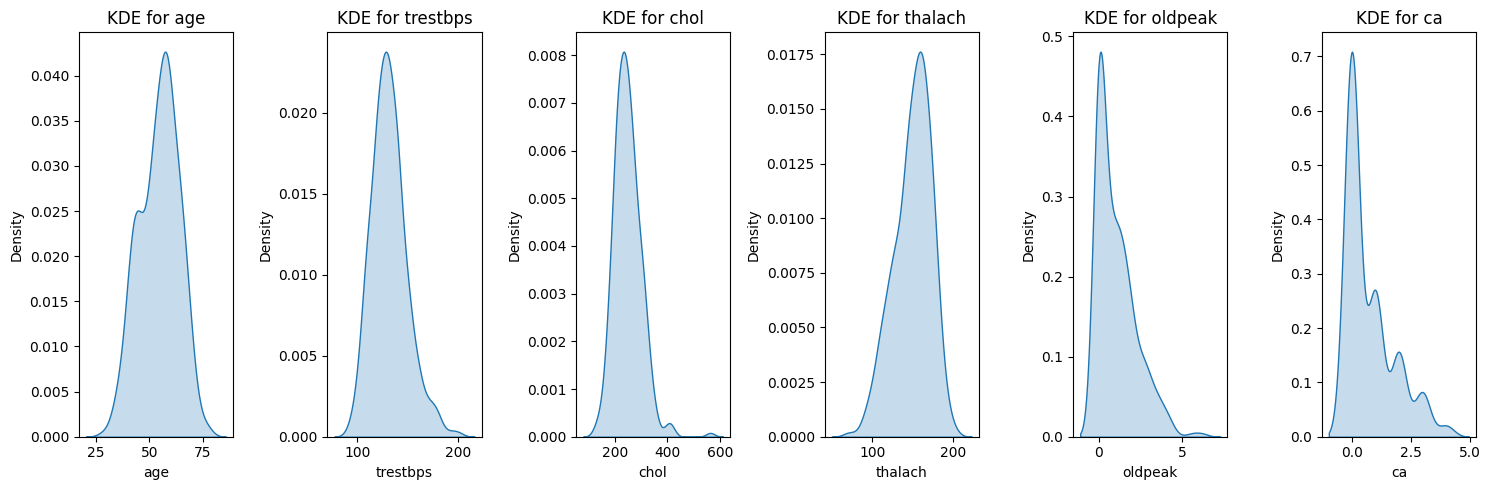

In [19]:

# Specify the variables you want to plot the KDE for
selected_columns = ['age', 'trestbps', 'chol', 'thalach','oldpeak','ca']  

# Create subplots: 1 row, len(selected_columns) columns
fig, axes = plt.subplots(1, len(selected_columns), figsize=(15, 5))

# Iterate over each selected variable and plot the KDE on a different subplot
for i, column in enumerate(selected_columns):
    sns.kdeplot(data=df[column], fill=True, ax=axes[i])  # Use 'ax' to specify subplot
    axes[i].set_title(f'KDE for {column}')  # Set the title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



In [20]:

# Specify the variable you want to calculate the skewness for
selected_column = ['age', 'trestbps', 'chol', 'thalach','oldpeak','ca']   

# Calculate the skewness for the selected variable using pandas
skewness_value = df[selected_column].skew()

# Print the skewness value
print(f'Skewness for {selected_column}: {skewness_value}')


Skewness for ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']: age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
ca          1.310422
dtype: float64


# Skewness Interpretation:
# - Skewness > 0 → Right-skewed (positively skewed)
# - Skewness < 0 → Left-skewed (negatively skewed)
# - Skewness ≈ 0 → Approximately normal distribution

# Skewness Classification:
# - Highly right-skewed (skewness > 1): chol, oldpeak, ca
# - Moderately right-skewed (0.5 < skewness ≤ 1): trestbps
# - Highly left-skewed (skewness < -1): None
# - Moderately left-skewed (-1 ≤ skewness < -0.5): thalach
# - Approximately normal (-0.5 ≤ skewness ≤ 0.5): age


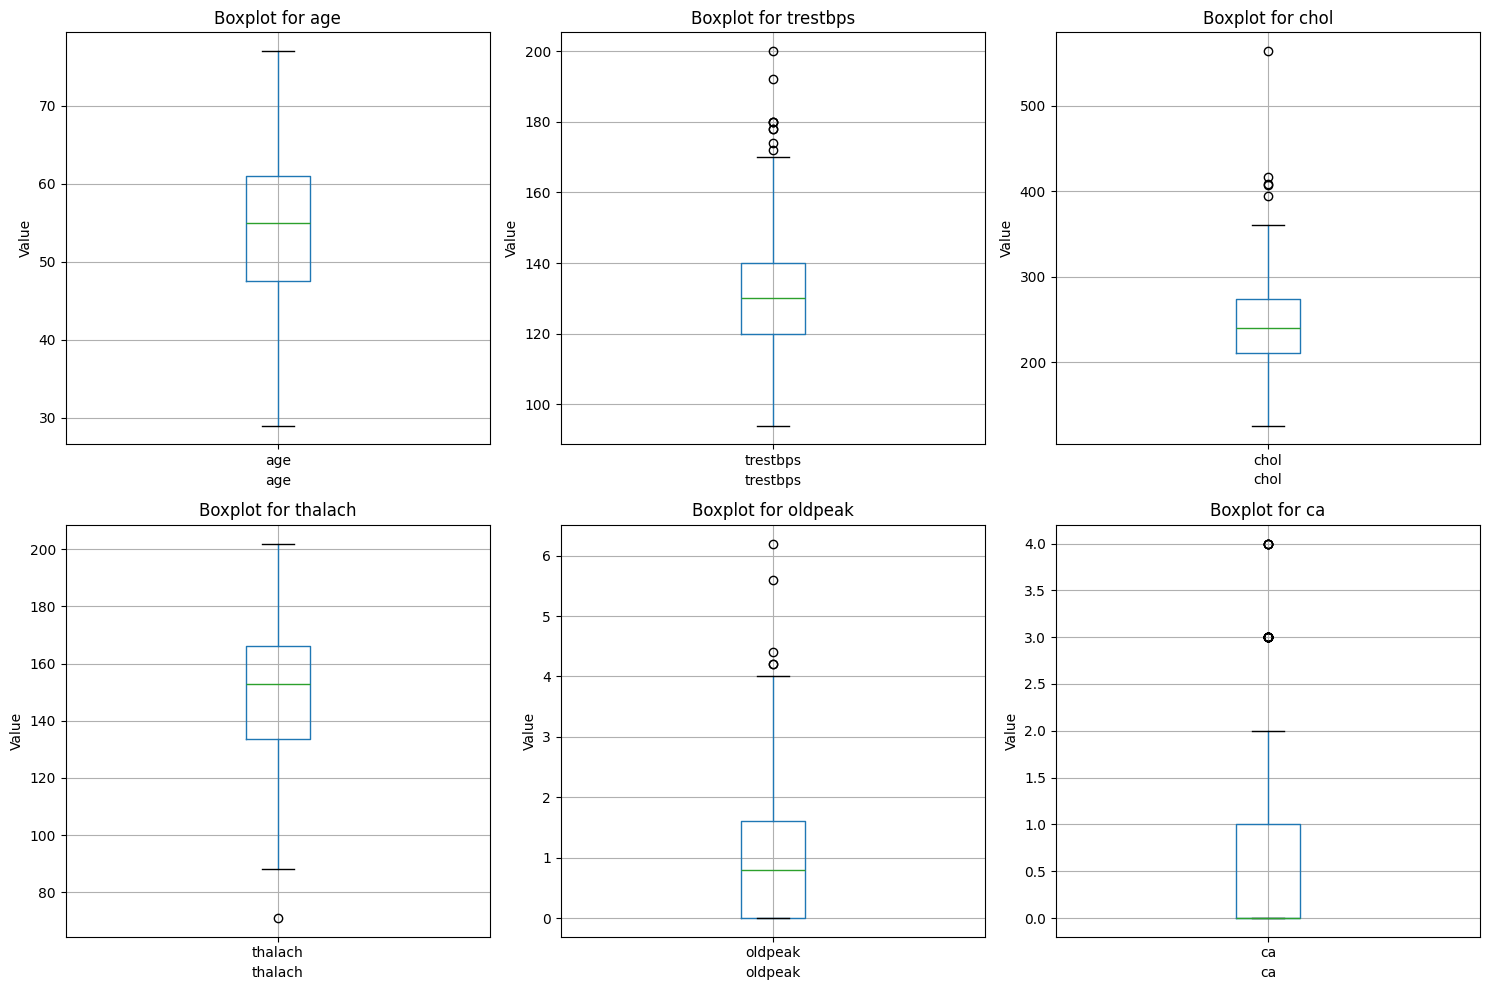

In [21]:
# Define the variables you want to plot
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca'] 
# Define the number of columns for the plot (e.g., show 3 plots per row)
num_columns = 3
# Calculate the number of rows based on the number of columns
num_rows = (len(selected_columns) + num_columns - 1) // num_columns
# Set up the figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
# Flatten the axes array to easily iterate over
axes = axes.flatten()
# Plotting Boxplot for each variable separately, side by side
for i, column in enumerate(selected_columns):
    df.boxplot(column=column, ax=axes[i])  # Plotting Boxplot for the current column
    axes[i].set_title(f'Boxplot for {column}')  # Title for each plot
    axes[i].set_xlabel(column)  # X-axis label as the column name
    axes[i].set_ylabel('Value')  # Y-axis label indicating the value
    axes[i].grid(True)  # Adding gridlines for better readability
# Hiding empty axes if there are fewer columns than subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to prevent overlapping
plt.tight_layout()  # Ensures proper spacing between plots
plt.show()


In [22]:
# Define the selected variables for analysis
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']  

# Calculate outliers using IQR for each variable
outliers = {}
outliers_count = {}  # Dictionary to store the count of outliers for each variable
for variable in selected_variables:
    # Calculate Q1 (first quartile) and Q3 (third quartile)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Extract the outlier values
    outliers[variable] = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)][variable]
    # Store the count of outliers
    outliers_count[variable] = len(outliers[variable])

# Display the outliers and their count for each selected variable
for variable, outlier_values in outliers.items():
    print(f'Outliers for {variable} (Count: {outliers_count[variable]}):')
    print(outlier_values)
    print('---')


Outliers for age (Count: 0):
Series([], Name: age, dtype: int64)
---
Outliers for trestbps (Count: 9):
8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64
---
Outliers for chol (Count: 5):
28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64
---
Outliers for thalach (Count: 1):
272    71
Name: thalach, dtype: int64
---
Outliers for oldpeak (Count: 5):
101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64
---
Outliers for ca (Count: 25):
52     3
92     4
97     3
99     3
158    4
163    4
164    4
165    3
181    3
191    3
204    3
208    3
217    3
220    3
231    3
234    3
238    3
247    3
249    3
250    3
251    4
252    3
255    3
267    3
291    3
Name: ca, dtype: int64
---


DEALING WITH OUTLYERS IN THE CONTINOUS and Discrete VARIABLRS

In [23]:

# Define the normal ranges for each variable (the ranges we want to check)
normal_ranges = {
    'trestbps': (90, 180),  # Blood pressure range
    'thalach': (100, 220),  # Maximum heart rate range
    'chol': (120, 350),     # Cholesterol range
    'oldpeak': (0, 4.5),    # ST depression range
    'ca': (0, 4)            # Number of major vessels (0-4)
}

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a copy of the dataframe to work on
df_cleaned = df.copy()

# Remove rows with values outside the normal range for each variable
for column in normal_ranges:
    min_value, max_value = normal_ranges[column]
    df_cleaned = df_cleaned[(df_cleaned[column] >= min_value) & (df_cleaned[column] <= max_value)]

# Calculate the IQR for the numeric columns after removing non-normal values
Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for detecting outliers for each variable
outlier_counts = {}

# Loop through each variable and find outliers based on IQR
for column in normal_ranges.keys():  # Loop only through the specified columns
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]

    # Detect remaining outliers
    outliers = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)

    # Count the number of outliers for the current column
    outlier_counts[column] = outliers.sum()

# Print the count of outliers for each variable
print("Count of outliers for each variable after removing non-normal values:")
print(outlier_counts)

# Show the outliers for each variable
print("\nOutliers for each variable after removing non-normal values:")
for column in normal_ranges.keys():  # Loop only through the specified columns
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    
    # Find the outliers
    outlier_values = df_cleaned[column][(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    
    if not outlier_values.empty:
        print(f"\nOutliers for {column}:")
        print(outlier_values.tolist())


Count of outliers for each variable after removing non-normal values:
{'trestbps': np.int64(7), 'thalach': np.int64(0), 'chol': np.int64(0), 'oldpeak': np.int64(3), 'ca': np.int64(23)}

Outliers for each variable after removing non-normal values:

Outliers for trestbps:
[172, 178, 180, 180, 174, 178, 180]

Outliers for oldpeak:
[4.2, 4.2, 4.4]

Outliers for ca:
[3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3]


In [24]:
# The outliers in the variables (trestbps, oldpeak, ca) represent rare but potentially valid cases.
# Given that the number of outliers is relatively small, keeping them should not significantly affect the model's performance.
# These outliers may reflect extreme but possible scenarios that the model should learn from, as they could represent 
# rare yet valid cases that occur in the real world, especially in medical data. Thus, we will retain them in the dataset.ش

 analyze the Categorical variables:['sex','cp','fbs','restecg','exang','slope','thal','target']
 

Percentage for sex:
sex
1    69.964664
0    30.035336
Name: proportion, dtype: float64
---
Percentage for cp:
cp
0    45.583039
2    28.975265
1    17.314488
3     8.127208
Name: proportion, dtype: float64
---
Percentage for fbs:
fbs
0    85.512367
1    14.487633
Name: proportion, dtype: float64
---
Percentage for restecg:
restecg
1    50.530035
0    48.056537
2     1.413428
Name: proportion, dtype: float64
---
Percentage for exang:
exang
0    68.19788
1    31.80212
Name: proportion, dtype: float64
---
Percentage for slope:
slope
2    48.409894
1    45.583039
0     6.007067
Name: proportion, dtype: float64
---
Percentage for thal:
thal
2    56.183746
3    37.102473
1     6.007067
0     0.706714
Name: proportion, dtype: float64
---
Percentage for target:
target
1    56.183746
0    43.816254
Name: proportion, dtype: float64
---


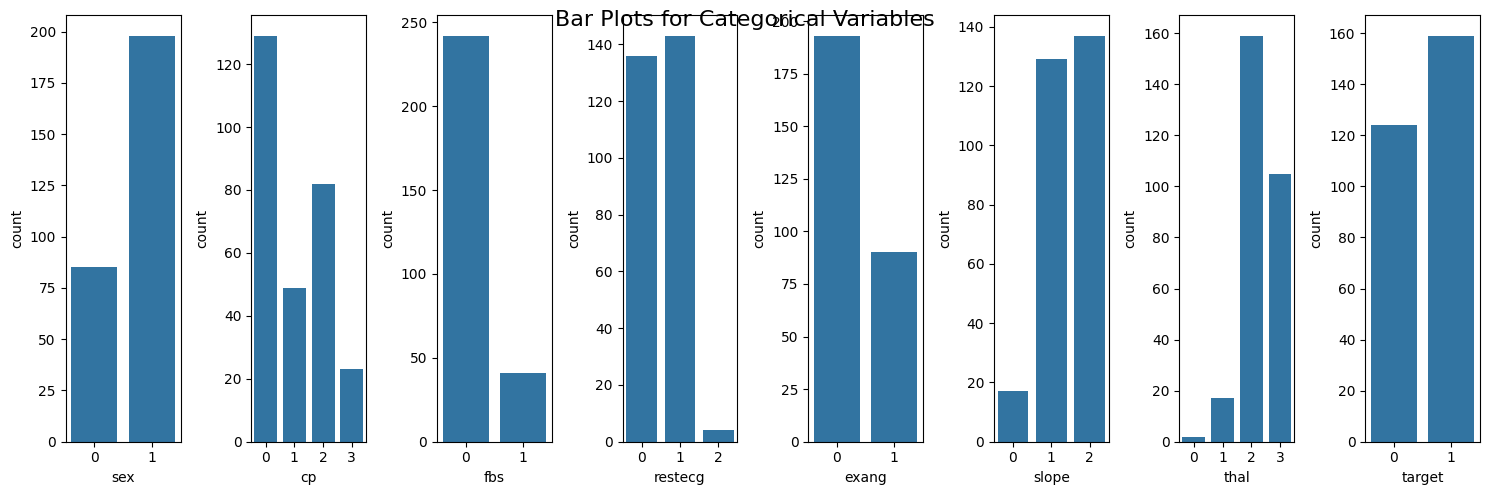

In [25]:
# List of variables you want to plot
selected_variables = ['age', 'trestbps', 'chol', 'thalach']  # Specify the variables you want here

# Calculate the percentages for each category in the selected categorical variables
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']  # Replace with your categorical variables in the data

for variable in categorical_variables:
    percentages = df_cleaned[variable].value_counts(normalize=True) * 100
    print(f"Percentage for {variable}:")
    print(percentages)
    print("---")

# Create bar charts for each categorical variable
fig, axes = plt.subplots(1, len(categorical_variables), figsize=(15, 5))

for i, var in enumerate(categorical_variables):
    sns.barplot(x=df_cleaned[var].value_counts().index, y=df_cleaned[var].value_counts(), ax=axes[i])
   

plt.tight_layout()
plt.suptitle('Bar Plots for Categorical Variables', fontsize=16)  # Add title for all bar plots
plt.show()


# To determine if there are outliers in categorical variables, we use the following guidelines:
# If any category represents less than 5% of the data, it may be considered rare or an outlier.
# If there is a significant imbalance between categories, it may need to be addressed.
#
# Analysis of the percentages obtained:
# ✅ sex: values (1: 68.3%) and (0: 31.7%)
# No significant imbalance, and there are no outliers.
# ✅ cp: values (0: 47.2%), (2: 28.7%), (1: 16.5%), (3: 7.6%)
# Category 3 has 7.6%, which is close to the minimum, but not rare enough to be considered an outlier.
# ✅ fbs: values (0: 85.1%), (1: 14.9%)
# No rare categories, but there is a clear imbalance.
# ✅ restecg: values (1: 50.2%), (0: 48.5%), (2: 1.3%)
# Category 2 has 1.3% → rare, and may need to be addressed.
# ✅ exang: values (0: 67.3%), (1: 32.7%)
# No rare categories.
# ✅ slope: values (2: 46.9%), (1: 46.2%), (0: 6.9%)
# Category 0 has 6.9%, which is close to the minimum, but not rare enough to be considered an outlier.
# ✅ thal: values (2: 54.8%), (3: 38.6%), (1: 5.9%), (0: 0.66%)
# Category 0 has 0.66% → very rare, and may need to be addressed.
# ✅ target: values (1: 54.5%), (0: 45.5%)
# No rare categories.

# Summary:

# 🔴 Potential rare(out lyers) categories:
# restecg (2): 1.3%
# thal (0): 0.66%

# ⚠️ Categories close to the minimum but not extremely rare(out lyers):
# cp (3): 7.6%
# slope (0): 6.9%

#**conclusions**
# 1 The restecg (2) and thal (0) categories may require further handling due to their rarity.
# For cp (3) and slope (0), while they are near the 5% threshold, they do not need immediate action as they are not considered rare.
# 2 The target distribution is balanced, and no data balancing is needed unless required after model training and evaluation.
# 3 Rare categories may represent real-world scenarios, so they won't be dealt with initially or removed. Any necessary actions will be taken after training the model and assessing its performance. 
# 4 As for the target variable, it has a balanced distribution and does not require data balancing unless needed after model training and evaluating its accuracy.


Analyze the relationship between variables using a heatmap 

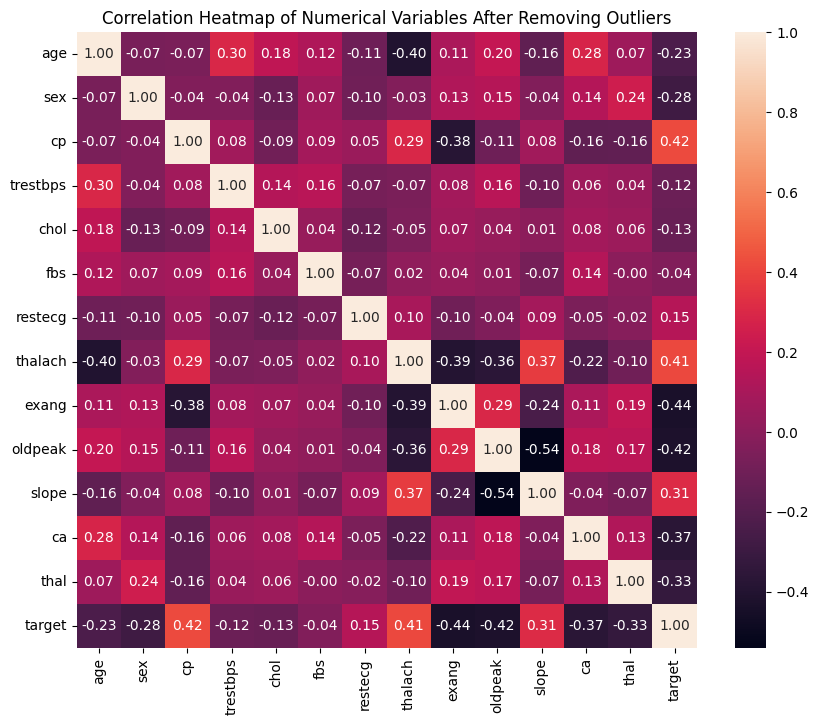

In [26]:

# Assuming 'df_cleaned' is your DataFrame after removing outliers

# Create a heatmap to show correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables After Removing Outliers')
plt.show()

# Create a pairplot for all variables in the dataset
# sns.pairplot(df_cleaned)
# plt.suptitle('Pairplot of All Variables After Removing Outliers', y=1.02)
# plt.show()


# If the correlation value is positive (between 0 and 1), this indicates a positive relationship between the variables, meaning that when one variable increases, the other also increases. The closer the correlation value is to 1, the stronger the positive relationship between the variables.
  However, a positive relationship does not necessarily mean that the relationship between the variables is always linear. The relationship can be either linear or non-linear, but it is most often referred to as a linear relationship when discussing correlation.
# If the correlation value is negative (between -1 and 0), this indicates an inverse relationship between the variables, meaning that when one variable increases, the other decreases. The closer the correlation value is to -1, the stronger the inverse relationship between the variables.
# If the correlation value equals 1 or -1, this means a perfect positive or negative relationship between the variables.


2.Data Preprocessing

   2.1 FEATURE ENGINEERING

     2.1.1 scalling

In [27]:


# Assuming 'df_cleaned' is the dataframe after cleaning

# Define the variables you want to scale/normalize or standardize
variables_to_standardize = ['age']  # These variables are normally distributed, so we apply Standardization (z-score scaling)
variables_to_normalize = ['trestbps', 'chol', 'thalach', 'oldpeak']  # These variables have skewness, so we apply Normalization (min-max scaling)

# Initialize the scaler for standardization and normalization
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

# Apply Standardization (z-score scaling) for variables with normal distribution
df_cleaned[variables_to_standardize] = scaler_standard.fit_transform(df_cleaned[variables_to_standardize])

# Apply Normalization (min-max scaling) for variables with skewed distribution
df_cleaned[variables_to_normalize] = scaler_normal.fit_transform(df_cleaned[variables_to_normalize])

# Display the first few rows of the dataframe to see the result
print(df_cleaned.head())


        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.984354    1   3  0.593023  0.495370    1        0  0.474747      0   
1 -1.848214    1   2  0.418605  0.574074    0        1  0.848485      0   
2 -1.412434    0   1  0.418605  0.361111    0        0  0.696970      0   
3  0.221739    1   1  0.302326  0.509259    0        1  0.757576      0   
5  0.330684    1   0  0.534884  0.305556    0        1  0.454545      0   

    oldpeak  slope  ca  thal  target  
0  0.522727      0   0     1       1  
1  0.795455      0   0     2       1  
2  0.318182      2   0     2       1  
3  0.181818      2   0     2       1  
5  0.090909      1   0     1       1  


3.MACHINE LEARNING

   3.1 (Train/Test Split)

In [29]:
  
# Define independent variables (X) and target variable (y)
X = df_cleaned.drop(columns=['target'])  # Exclude the target variable
y = df_cleaned['target']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the resulting datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (226, 13) (226,)
Testing data shape: (57, 13) (57,)


3.2 (Model Selection)

Logistic Regression Performance:
  Accuracy: 0.8772
  Precision: 0.8205
  Recall: 1.0000
  F1-Score: 0.9014

Random Forest Performance:
  Accuracy: 0.8596
  Precision: 0.8000
  Recall: 1.0000
  F1-Score: 0.8889

SVM Performance:
  Accuracy: 0.8772
  Precision: 0.8205
  Recall: 1.0000
  F1-Score: 0.9014

KNN Performance:
  Accuracy: 0.8772
  Precision: 0.8571
  Recall: 0.9375
  F1-Score: 0.8955



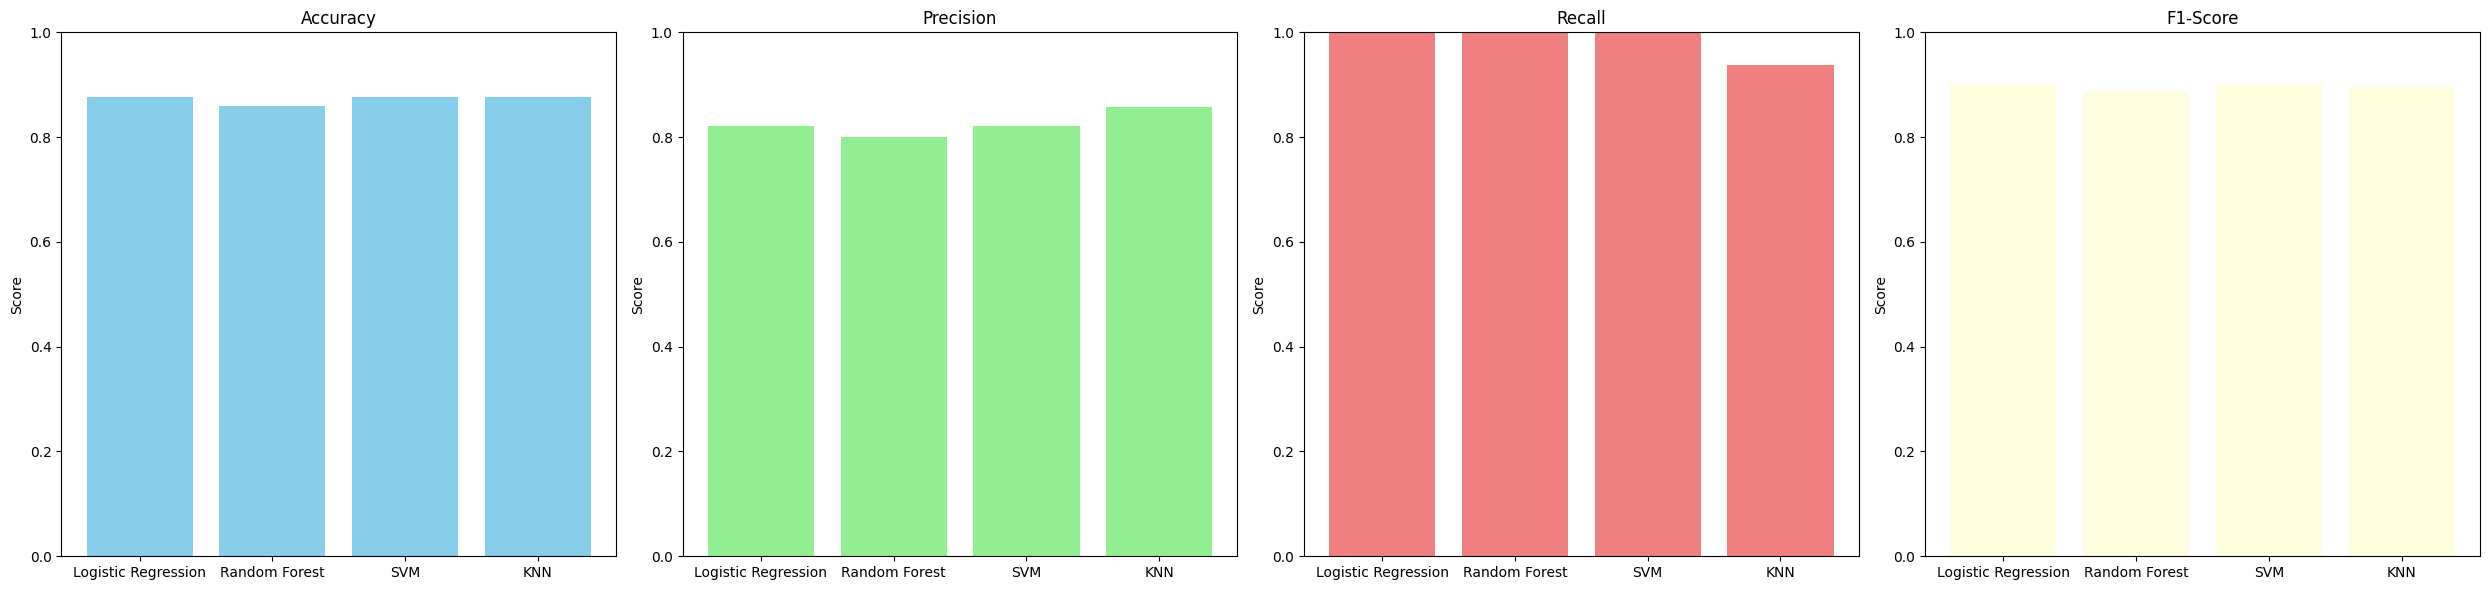

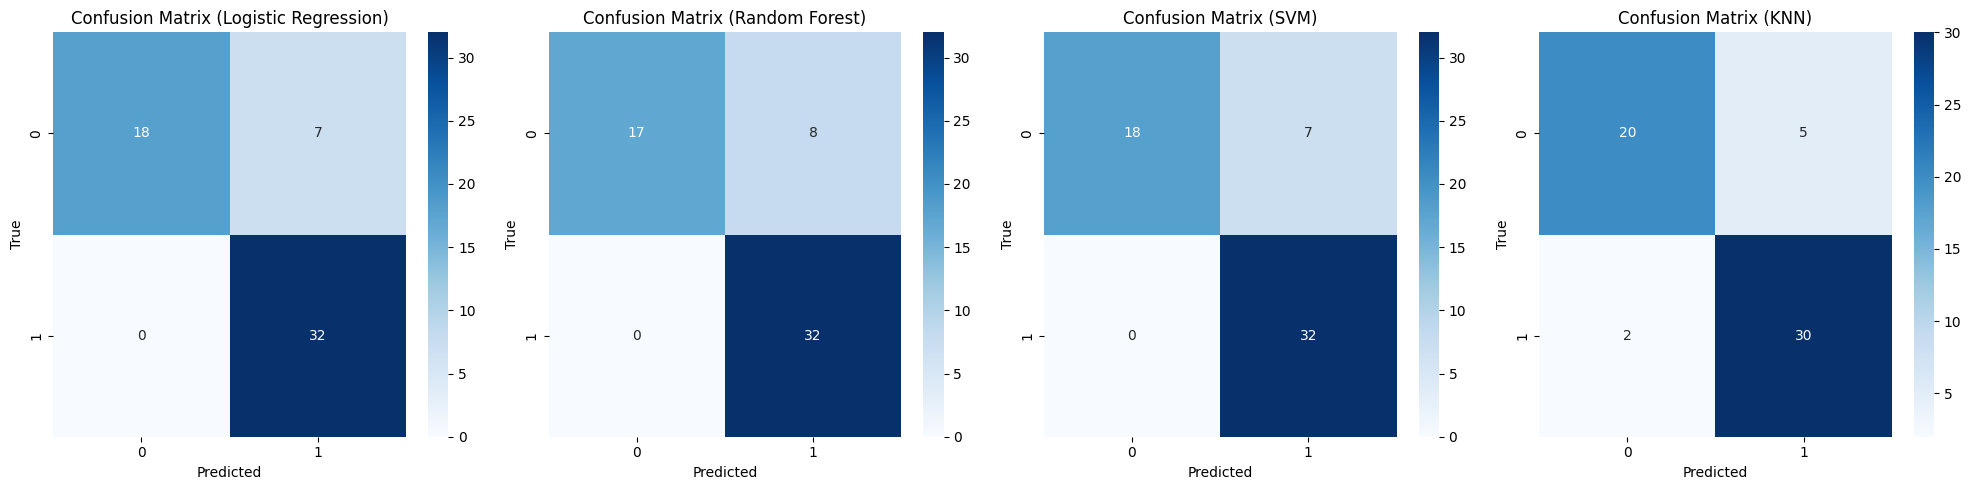

In [30]:

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Dictionary to store evaluation results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    
    # Print model performance
    print(f"{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}\n")

# Create subplots for evaluation metrics
fig, axes = plt.subplots(1, 4, figsize=(25, 6))

# Plot Accuracy
axes[0].bar(results["Model"], results["Accuracy"], color='skyblue')
axes[0].set_title('Accuracy')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)

# Plot Precision
axes[1].bar(results["Model"], results["Precision"], color='lightgreen')
axes[1].set_title('Precision')
axes[1].set_ylabel('Score')
axes[1].set_ylim(0, 1)

# Plot Recall
axes[2].bar(results["Model"], results["Recall"], color='lightcoral')
axes[2].set_title('Recall')
axes[2].set_ylabel('Score')
axes[2].set_ylim(0, 1)

# Plot F1-Score
axes[3].bar(results["Model"], results["F1-Score"], color='lightyellow')
axes[3].set_title('F1-Score')
axes[3].set_ylabel('Score')
axes[3].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Plot confusion matrices for all models
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix ({name})')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()


**# Selected Model: Logistic Regression**  
**# Reason:** Based on the evaluation metrics, Logistic Regression achieved an accuracy of **87.72%**, a precision of **82.05%**, a recall of **100%**, and an F1-score of **90.14%**. The **100% recall** is particularly important for our task since we want to minimize false negatives—i.e., we don't want to miss predicting a person who actually has heart disease. While other models like SVM performed similarly, Logistic Regression is more interpretable and computationally efficient, making it a strong choice for deployment.

3.3 (Model Tuning for the selection model:Logistic Regression)

In [31]:

# Define parameter grid to search for best hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Optimization solvers
}

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the model using the best parameters
best_log_reg = LogisticRegression(**grid_search.best_params_, max_iter=1000)
best_log_reg.fit(X_train, y_train)

# Evaluate the tuned model
y_pred = best_log_reg.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.8094685990338164
Tuned Model Accuracy: 0.8771929824561403
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       0.82      1.00      0.90        32

    accuracy                           0.88        57
   macro avg       0.91      0.86      0.87        57
weighted avg       0.90      0.88      0.87        57



3.4 Model evaluation after tuning(visual evaluation)

🔹 Final Tuned Model Evaluation 🔹
Tuned Model Accuracy: 0.8772
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       0.82      1.00      0.90        32

    accuracy                           0.88        57
   macro avg       0.91      0.86      0.87        57
weighted avg       0.90      0.88      0.87        57



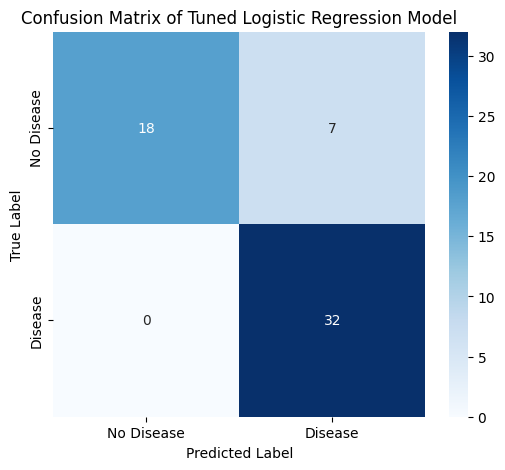

In [32]:

# Predict on test set using the tuned model
y_pred = best_log_reg.predict(X_test)

# Print final evaluation metrics
print("🔹 Final Tuned Model Evaluation 🔹")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Tuned Logistic Regression Model")
plt.show()


In [ ]:
# The model performs quite well with an overall accuracy of 88%. 
# The precision for the negative class (0) is perfect at 1.00, indicating that when the model predicts a negative instance, it is correct 100% of the time.
# However, recall for the negative class is lower at 0.72, meaning the model fails to detect 28% of the actual negative instances.
# For the positive class (1), the recall is perfect at 1.00, meaning the model identifies all positive instances.
# Precision for the positive class is 0.82, indicating some errors in predicting positive instances, but still good.
# The F1-score for both classes is strong, especially for the positive class (0.90), which shows a good balance between precision and recall.
# The weighted average precision, recall, and F1-score are also solid, indicating the model's overall robust performance.
# While the model's overall performance is good, improvements in recall for the negative class would make it even stronger.


 3.5 Making a Predictive System 

In [36]:

# ✅ Define the feature names (same as used in training)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# ✅ Define the new input data (Make sure the order matches the feature names)
input_data = (70, 1, 4, 130, 322, 0, 2, 109, 0, 2.4, 2, 3, 3)

# ✅ Convert the tuple into a Pandas DataFrame with column names
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# ✅ Standardization & Normalization (Using previously fitted scalers)
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

# Standardize specific variables (e.g., 'age')
input_data_df[['age']] = scaler_standard.fit_transform(input_data_df[['age']])  

# Normalize specific variables (e.g., 'trestbps', 'chol', 'thalach', 'oldpeak')
input_data_df[['trestbps', 'chol', 'thalach', 'oldpeak']] = scaler_normal.fit_transform(
    input_data_df[['trestbps', 'chol', 'thalach', 'oldpeak']])

# ✅ Ensure input is formatted correctly
print("Processed Input Data for Prediction:\n", input_data_df)

# ✅ Use the trained logistic regression model (`best_log_reg`) for prediction
prediction = best_log_reg.predict(input_data_df)

# ✅ Print prediction result
print("Prediction:", prediction)

# ✅ Interpret the prediction
if prediction[0] == 0:
    print("🟢 The person does NOT have heart disease.")
else:
    print("🔴 The person HAS heart disease.")


Processed Input Data for Prediction:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  0.0    1   4       0.0   0.0    0        2      0.0      0      0.0      2   

   ca  thal  
0   3     3  
Prediction: [1]
🔴 The person HAS heart disease.


3.6 save the model

In [ ]:

# Define the filename for saving the trained model
filename = 'heart_disease_model.pkl'

# Save the trained logistic regression model using the best parameters
with open(filename, 'wb') as file:  # Open file in write-binary mode
    pickle.dump(best_log_reg, file)  # Save the trained model

print(f'Model has been saved as {filename}')  # Confirm successful saving


Model has been saved as heart_disease_model.pkl


3.7 load the model

In [43]:

# Load the trained model
with open('heart_disease_model.pkl', 'rb') as file:  # Read binary mode
    loaded_model = pickle.load(file)

# Ensure X_test is preprocessed in the same way as training data before prediction
new_prediction = loaded_model.predict(X_test)

# Print the predictions
print('Prediction from loaded model:', new_prediction)
print(f'The List contains {len(new_prediction)} predictions')

# Print the shape of X_test to confirm the input dimensions
print(f'Shape of X_test: {X_test.shape}')




Prediction from loaded model: [0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1]
The List contains 57 predictions
Shape of X_test: (57, 13)


In [44]:
# Print the current working directory
path = os.getcwd()
print(f'Current working directory: {path}')

Current working directory: c:\Users\hp\Desktop\Heart_disease-diagnosis
